<h1 id="tocheading">Table of Contents and Notebook Setup</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from datetime import timedelta, datetime

# Importing Data

## Importing Hourly Resolution Data

### Obtaining Longitudes and Latitudes from All Stations

We start by reading the first two lines of the data file to obtain the longitude and latitude information of the stations. We zip them together into a list of tuples, and add an element to the beginning of this list corresponding to the time.

In [3]:
lon_and_lat = np.genfromtxt('AllStations_temperature_h_2017.dat', delimiter=" ", max_rows=2)
longitudes = lon_and_lat[0][~np.isnan(lon_and_lat[0])]
latitudes = lon_and_lat[1][~np.isnan(lon_and_lat[1])]

indices = list(zip(longitudes, latitudes))
indices.insert(0, "time")

### Reading the Temperature Data

We now read in the temperature data, skipping the first two rows that contain the longitude and latitude information of the stations. The column names of the dataframe are the longitude and latitude tuples created above, and the index column is the timestamps.

In [4]:
df = pd.read_csv('AllStations_temperature_h_2017.dat', sep='\s+', skiprows=[0,1], names=indices, index_col = 'time')
df.head()

,236.554,236.499,236.679,236.607,236.514,236.630,236.523,236.543,236.662,236.304,...,236.641,236.619,236.514,236.357,236.574,236.596,236.676,236.691,236.689,236.451
,48.5745,48.5376,48.4655,48.4608,48.4356,48.5273,48.4529,48.6804,48.4562,48.3891,...,48.4683,48.4744,48.4205,48.6568,48.4533,48.6529,48.4865,48.4623,48.4359,48.4572
time,,,,,,,,,,,,,,,,,,,,,
733408.0000,3.25,1.43,4.21,4.62,3.45,4.44,2.72,3.97,4.68,5.12,...,4.29,4.10,3.01,NaN,4.00,4.81,4.58,NaN,4.87,4.07
733408.0417,3.06,1.38,4.28,4.77,3.46,4.21,2.64,4.15,4.61,4.95,...,4.41,4.30,2.87,NaN,4.15,4.60,4.44,NaN,4.85,4.05
733408.0833,1.90,1.18,4.12,4.70,3.46,4.07,2.64,4.18,4.62,5.11,...,4.24,4.23,2.97,NaN,4.06,4.65,4.47,NaN,4.91,4.02
733408.1250,1.69,0.98,4.20,4.77,3.65,3.67,2.81,4.27,4.71,5.33,...,4.36,4.30,3.10,NaN,4.12,4.75,4.53,NaN,4.97,4.06
733408.1667,2.09,0.93,4.61,4.99,3.90,3.55,3.11,4.29,4.93,5.56,...,4.58,4.53,3.37,NaN,4.25,4.97,4.68,NaN,5.17,4.27


### Changing the Datetimes into Appropriate Timestamps

The Datetimes used in this file are MATLAB datetimes. We use a function to convert each time in the time column to the appropriate timestamp and then change the index column into timestamps.

In [5]:
def matlab_to_python_datetime(matlab_datenum):
    return datetime.fromordinal(int(matlab_datenum)) + timedelta(days=matlab_datenum%1) - timedelta(days = 366)

df.index = [matlab_to_python_datetime(i) for i in df.index]
df.head()

,236.554,236.499,236.679,236.607,236.514,236.630,236.523,236.543,236.662,236.304,...,236.641,236.619,236.514,236.357,236.574,236.596,236.676,236.691,236.689,236.451
,48.5745,48.5376,48.4655,48.4608,48.4356,48.5273,48.4529,48.6804,48.4562,48.3891,...,48.4683,48.4744,48.4205,48.6568,48.4533,48.6529,48.4865,48.4623,48.4359,48.4572
2008-01-01 00:00:00.000000,3.25,1.43,4.21,4.62,3.45,4.44,2.72,3.97,4.68,5.12,...,4.29,4.10,3.01,NaN,4.00,4.81,4.58,NaN,4.87,4.07
2008-01-01 01:00:02.879995,3.06,1.38,4.28,4.77,3.46,4.21,2.64,4.15,4.61,4.95,...,4.41,4.30,2.87,NaN,4.15,4.60,4.44,NaN,4.85,4.05
2008-01-01 01:59:57.120005,1.90,1.18,4.12,4.70,3.46,4.07,2.64,4.18,4.62,5.11,...,4.24,4.23,2.97,NaN,4.06,4.65,4.47,NaN,4.91,4.02
2008-01-01 03:00:00.000000,1.69,0.98,4.20,4.77,3.65,3.67,2.81,4.27,4.71,5.33,...,4.36,4.30,3.10,NaN,4.12,4.75,4.53,NaN,4.97,4.06
2008-01-01 04:00:02.879995,2.09,0.93,4.61,4.99,3.90,3.55,3.11,4.29,4.93,5.56,...,4.58,4.53,3.37,NaN,4.25,4.97,4.68,NaN,5.17,4.27


### Finding the Required Station

These are the coordinates where we wish to measure the temperature. We look for the station nearest to this point.

In [6]:
station_lon = 236.691
station_lat =  48.462

In [7]:
lon_diff = abs(longitudes - station_lon)
lat_diff = abs(latitudes - station_lat)

station_num = list((lon_diff+lat_diff)).index(min(lon_diff+lat_diff))

station_num provides the column number of the data we wish to observe.

## Importing Minute Resolution Data

Now we import the minute resolution data, which only contains data from the one UvicSci temperature data station. We begin by getting the time information, which contains the the start and end time, and the number of measurements taken.

In [8]:
time_info = np.genfromtxt('UVicSci_temperature.dat', delimiter=" ", max_rows=3)
t0 = time_info[0]
tf = time_info[1]
N = time_info[2]

Since the time between measurements is always one minute, we can generate an array of times of measurements based on the information above.

In [9]:
incrementer = (tf-t0)/N
timearray = np.arange(t0, tf, incrementer)

We now open  the actual temperature data, and create a dataframe using the appropriate timestamps.

In [10]:
df2 = pd.read_csv('UVicSci_temperature.dat', sep='\s+', skiprows=[0,1,2], names=['Temperature'])
df2.index = [matlab_to_python_datetime(i) for i in timearray]
df2.head()

,Temperature
2012-01-01 00:00:00.000000,4.5
2012-01-01 00:00:59.999976,4.5
2012-01-01 00:01:59.999953,4.5
2012-01-01 00:02:59.999929,4.5
2012-01-01 00:03:59.999905,4.5


# Answering Question 4

## Part 1

### Plotting the Time Series of Each on the Same Plot

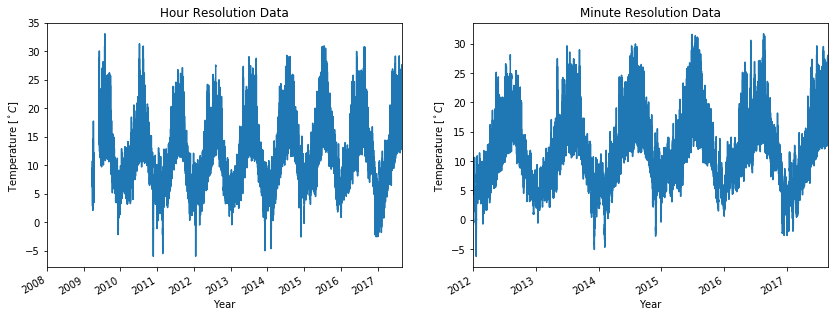

In [11]:
fig = plt.figure(figsize=(14,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# Plots Data
df.iloc[:,station_num].plot(ax=ax1)
df2.iloc[:,0].plot(ax=ax2)

# Hour Resolution Plot Labels
ax1.set_title('Hour Resolution Data')
ax1.set_ylabel('Temperature $[^\circ C]$')
ax1.set_xlabel('Year')

# Minute Resolution Plot Labels
ax2.set_title('Minute Resolution Data')
ax2.set_ylabel('Temperature $[^\circ C]$')
ax2.set_xlabel('Year')

plt.show()

### Comparing Sample Mean and Standard Deviation

In [12]:
hour_res_mean = df.iloc[:,station_num].mean()
print(r'The hour resolution data mean is {} degrees celcius'.format(hour_res_mean))

min_res_mean = df2.iloc[:,0].mean()
print(r'The minute resolution data mean is {} degrees celcius'.format(min_res_mean))

The hour resolution data mean is 11.197364992499582 degrees celcius
The minute resolution data mean is 11.295307534744492 degrees celcius


$\boxed{\text{The minute resolution mean is slightly higher than the hour resolution mean}}$

In [13]:
hour_res_std = df.iloc[:,station_num].std()
print(r'The hour resolution data standard deviation is {} degrees celcius'.format(hour_res_std))

min_res_std = df2.iloc[:,0].std()
print(r'The minute resolution data standard deviation is {} degrees celcius'.format(min_res_std))

The hour resolution data standard deviation is 5.530616839248524 degrees celcius
The minute resolution data standard deviation is 5.6089523874564415 degrees celcius


$\boxed{\text{The minute resolution standard deviation is higher than the hour resolution mean}}$

It would be hasty to conclude that the hourly resolution does not provide accurate statisitcs as the two data sets span over different time frames.

### Generating approximate pdf's

Below we plot histograms of the temperature data for both the minute and hour resolution data.

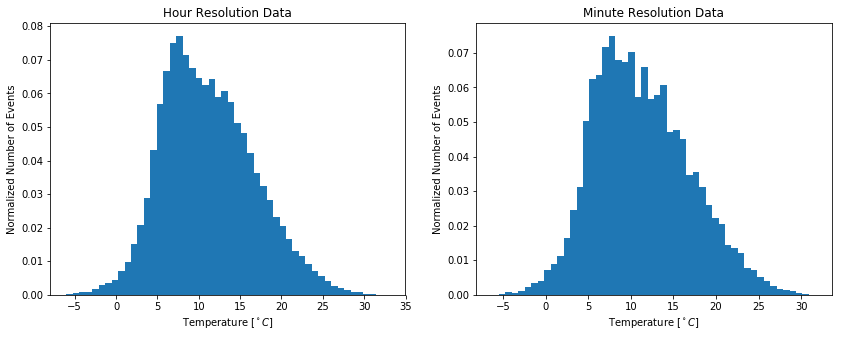

In [14]:
fig = plt.figure(figsize=(14,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# Plots Data
df.iloc[:,station_num].plot.hist(bins=50, ax=ax1, normed=True, stacked=True)
df2.iloc[:,0].plot.hist(bins=50, ax=ax2, normed=True, stacked=True)

# Hour Resolution Plot Labels
ax1.set_title('Hour Resolution Data')
ax1.set_xlabel('Temperature $[^\circ C]$')
ax1.set_ylabel('Normalized Number of Events')

# Minute Resolution Plot Labels
ax2.set_title('Minute Resolution Data')
ax2.set_xlabel('Temperature $[^\circ C]$')
ax2.set_ylabel('Normalized Number of Events')

plt.show()

From these histograms, we can generate pdf functions. matplotlib has a built in library to do this for us.

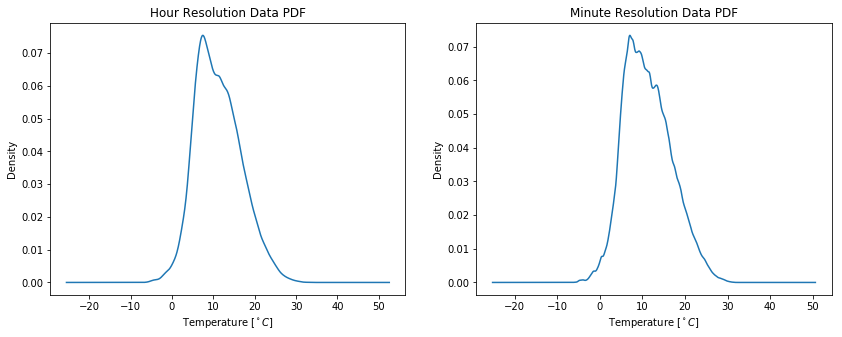

In [15]:
fig = plt.figure(figsize=(14,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# Plots Data
df.iloc[:,station_num].plot.density(ax=ax1)
df2.iloc[:,0].plot.density(ax=ax2)

# Hour Resolution Plot Labels
ax1.set_title('Hour Resolution Data PDF')
ax1.set_xlabel('Temperature $[^\circ C]$')

# Minute Resolution Plot Labels
ax2.set_title('Minute Resolution Data PDF')
ax2.set_xlabel('Temperature $[^\circ C]$')

plt.show()

### Comparing pdf's With Normal Distributions

The data spread above certainly isn't normal, but we can compare it to the corresponding normal distribution with an equivalent mean and standard deviation.

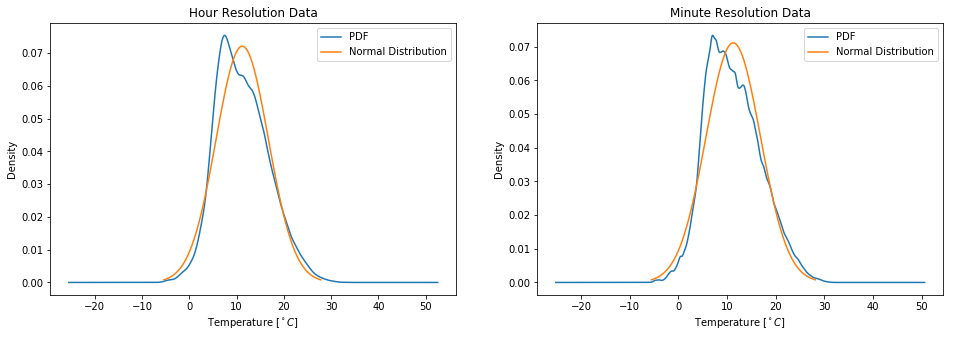

In [16]:
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# Plots pdf's
df.iloc[:,station_num].plot.density(ax=ax1, label='PDF')
df2.iloc[:,0].plot.density(ax=ax2, label = 'PDF')

#Plots normal distribution stuff
x_hour = np.linspace(hour_res_mean-3*hour_res_std, hour_res_mean+3*hour_res_std, 100)
ax1.plot(x_hour, sp.stats.norm.pdf(x_hour, hour_res_mean, hour_res_std), label ='Normal Distribution')

x_min = np.linspace(min_res_mean-3*min_res_std, min_res_mean+3*min_res_std, 100)
ax2.plot(x_min, sp.stats.norm.pdf(x_min, min_res_mean, min_res_std), label ='Normal Distribution')


# Hour Resolution Plot Labels
ax1.set_title('Hour Resolution Data')
ax1.set_xlabel('Temperature $[^\circ C]$')

# Minute Resolution Plot Labels
ax2.set_title('Minute Resolution Data')
ax2.set_xlabel('Temperature $[^\circ C]$')

#Legend Stuff
ax1.legend(loc='best')
ax2.legend(loc='best')

plt.show()

Despite having the same mean and standard deviation, the PDF's differ significantly from their corresponding normal approximations. The actual PDF is skewed slightly towards colder temperatures. 

## Part 2

### Comparing Sample Mean and Standard Deviation

We now trunctate both dataframes to only include data from 2012. Since the two data sets will now span the same time, they should have the same mean and standard deviation.

In [17]:
df_trunc = df[df.index.year == 2012]
df2_trunc = df2[df2.index.year == 2012]

In [18]:
hour_res_mean_2012 = df_trunc.iloc[:,station_num].mean()
print(r'The hour resolution data mean is {} degrees celcius'.format(hour_res_mean_2012))

min_res_mean_2012 = df2_trunc.iloc[:,0].mean()
print(r'The minute resolution data mean is {} degrees celcius'.format(min_res_mean_2012))

The hour resolution data mean is 9.999968419774111 degrees celcius
The minute resolution data mean is 9.997013100626239 degrees celcius


$\boxed{\text{The means are equal up to the third decimal point}}$

In [19]:
hour_res_std_2012 = df_trunc.iloc[:,station_num].std()
print(r'The hour resolution data mean is {} degrees celcius'.format(hour_res_std_2012))

min_res_std_2012 = df2_trunc.iloc[:,0].std()
print(r'The minute resolution data mean is {} degrees celcius'.format(min_res_std_2012))

The hour resolution data mean is 5.0076305791728695 degrees celcius
The minute resolution data mean is 5.008998127627959 degrees celcius


$\boxed{\text{The standard deviations are equal up to the third decimal point}}$

Since the data now corresponds to the same time frame, the means and standard deviations are closer to eachother.

### Generating approximate pdf's

Below we plot histograms of the temperature data for both the minute and hour resolution data during 2012.

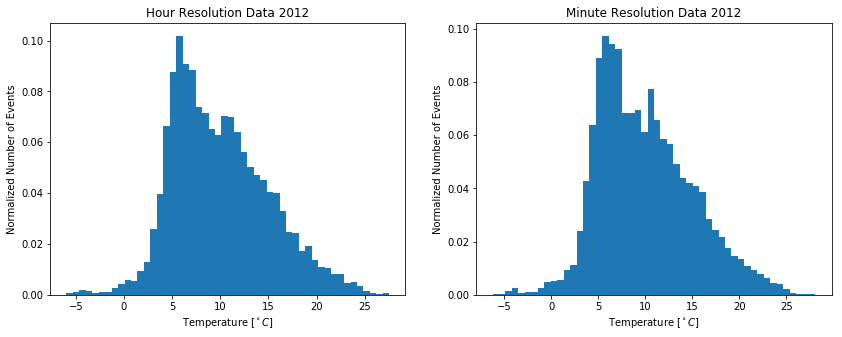

In [20]:
fig = plt.figure(figsize=(14,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# Plots Data
df_trunc.iloc[:,station_num].plot.hist(bins=50, ax=ax1, normed=True, stacked=True)
df2_trunc.iloc[:,0].plot.hist(bins=50, ax=ax2, normed=True, stacked=True)

# Hour Resolution Plot Labels
ax1.set_title('Hour Resolution Data 2012')
ax1.set_xlabel('Temperature $[^\circ C]$')
ax1.set_ylabel('Normalized Number of Events')

# Minute Resolution Plot Labels
ax2.set_title('Minute Resolution Data 2012')
ax2.set_xlabel('Temperature $[^\circ C]$')
ax2.set_ylabel('Normalized Number of Events')

plt.show()

Like before, we generate the PDF's for each distribution.

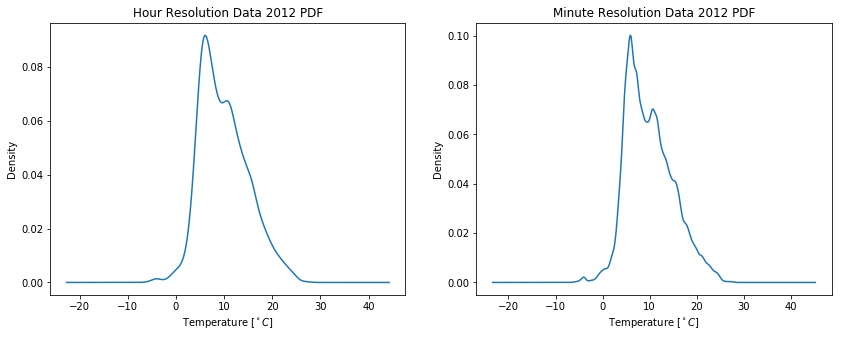

In [21]:
fig = plt.figure(figsize=(14,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# Plots Data
df_trunc.iloc[:,station_num].plot.density(ax=ax1)
df2_trunc.iloc[:,0].plot.density(ax=ax2)

# Hour Resolution Plot Labels
ax1.set_title('Hour Resolution Data 2012 PDF')
ax1.set_xlabel('Temperature $[^\circ C]$')

# Minute Resolution Plot Labels
ax2.set_title('Minute Resolution Data 2012 PDF')
ax2.set_xlabel('Temperature $[^\circ C]$')

plt.show()

While these PDF's are not identitcal, they have more similarities than the non-trunctated 2012 data sets. This is, of course, expected, as the data being analyzed extends the same time frame.

### Comparing pdf's With Normal Distributions

We now proceed to plot the pdfs next to the corresponding normal distributions <b> from before. </b> Note that these normal distributions were calculated using data from all times (not just 2012). These normal distribution may bare little resemblance to the pdfs generated by a subset of the data.

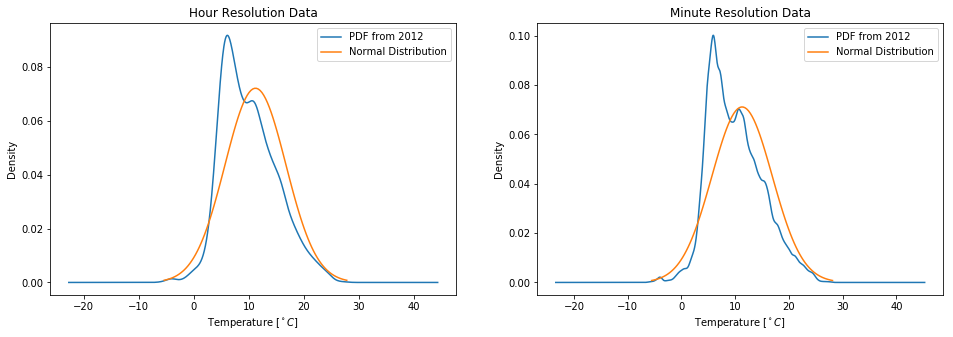

In [22]:
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# Plots pdf's
df_trunc.iloc[:,station_num].plot.density(ax=ax1, label='PDF from 2012')
df2_trunc.iloc[:,0].plot.density(ax=ax2, label = 'PDF from 2012')

#Plots normal distribution stuff
x_hour = np.linspace(hour_res_mean-3*hour_res_std, hour_res_mean+3*hour_res_std, 100)
ax1.plot(x_hour, sp.stats.norm.pdf(x_hour, hour_res_mean, hour_res_std), label ='Normal Distribution')

x_min = np.linspace(min_res_mean-3*min_res_std, min_res_mean+3*min_res_std, 100)
ax2.plot(x_min, sp.stats.norm.pdf(x_min, min_res_mean, min_res_std), label ='Normal Distribution')


# Hour Resolution Plot Labels
ax1.set_title('Hour Resolution Data')
ax1.set_xlabel('Temperature $[^\circ C]$')

# Minute Resolution Plot Labels
ax2.set_title('Minute Resolution Data')
ax2.set_xlabel('Temperature $[^\circ C]$')

#Legend Stuff
ax1.legend(loc='best')
ax2.legend(loc='best')

plt.show()

Once again, the PDFs are skewed towards colder temperatures.